In [38]:
from Chapter2.CreateDataset import CreateDataset
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
from util.VisualizeDataset import VisualizeDataset
from util import util
plt.rcParams["figure.figsize"] = [15,5]

In [53]:
raw_data_path = "data/raw_data/processed_data/"
output_data_path = "data/raw_data/processed_data/ch5_"

In [40]:
accraw = pd.read_csv(raw_data_path + "Accelerometer.csv")
timecol = "Time (s)"
accfeatures = list()
for col in accraw:
    if (col != timecol) and \
    (col != "Absolute acceleration (m/s^2)") and \
    (col != "Unnamed: 0") and \
    (col != "Unnamed: 1"):
        accfeatures.append(col)
accfeatures

['Acceleration x (m/s^2)', 'Acceleration y (m/s^2)', 'Acceleration z (m/s^2)']

In [41]:
accraw 

,Unnamed: 0,Unnamed: 1,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
0,_bike,0,1.622887e+18,0.022585,0.904130,-4.830960
1,_bike,1,1.622887e+18,0.384303,0.504085,-4.603390
2,_bike,2,1.622887e+18,0.743624,0.080086,-4.208136
3,_bike,3,1.622887e+18,1.016709,-0.245700,-3.863187
4,_bike,4,1.622887e+18,1.016709,-0.456502,-3.899119
...,...,...,...,...,...,...
830553,_walk_o,118641,1.622886e+18,0.674155,-7.748338,-4.416542
830554,_walk_o,118642,1.622886e+18,0.688528,-6.933875,-5.099254
830555,_walk_o,118643,1.622886e+18,0.767579,-6.212836,-5.408270
830556,_walk_o,118644,1.622886e+18,0.952031,-5.575639,-5.482530


In [42]:
gyraw = pd.read_csv(raw_data_path + "Gyroscope.csv")
gyfeatures = list()
for col in gyraw:
    if (col != timecol) and \
    (col != "Absolute (rad/s)") and \
    (col != "Unnamed: 0") and \
    (col != "Unnamed: 1"):
        gyfeatures.append(col)
gyfeatures

['Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)']

In [43]:
gyraw

,Unnamed: 0,Unnamed: 1,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s)
0,_bike,0,1.622887e+18,2.791951,1.383230,-0.163659
1,_bike,1,1.622887e+18,2.845215,1.415720,-0.147147
2,_bike,2,1.622887e+18,2.997015,1.535562,-0.130103
3,_bike,3,1.622887e+18,3.170653,1.608000,-0.121581
4,_bike,4,1.622887e+18,3.291560,1.572314,-0.131168
...,...,...,...,...,...,...
415218,_walk_o,59310,1.622886e+18,3.224448,0.141665,-0.157267
415219,_walk_o,59311,1.622886e+18,3.284103,0.105979,-0.291490
415220,_walk_o,59312,1.622886e+18,3.271853,0.181080,-0.371385
415221,_walk_o,59313,1.622886e+18,3.188762,0.344598,-0.392158


In [44]:
lightraw = pd.read_csv(raw_data_path + "Light.csv")
lightfeatures = list()
for col in lightraw:
    if (col != timecol) and \
    (col != "Unnamed: 0") and \
    (col != "Unnamed: 1"):
        lightfeatures.append(col)
lightfeatures

['Illuminance (lx)']

In [45]:
lightraw

,Unnamed: 0,Unnamed: 1,Time (s),Illuminance (lx)
0,_bike,0,1.622887e+18,0.0
1,_dance,0,1.622884e+18,0.0
2,_dance,1,1.622884e+18,0.0
3,_dance,2,1.622884e+18,4.0
4,_dance,3,1.622884e+18,2.0
...,...,...,...,...
145,_walk_i,45,1.622884e+18,0.0
146,_walk_i,46,1.622884e+18,0.0
147,_walk_i,47,1.622884e+18,0.0
148,_walk_i,48,1.622884e+18,0.0


In [46]:
locraw = pd.read_csv(raw_data_path + "Location.csv")
locfeatures = list()
for col in locraw:
    if (col != timecol) and \
    (col != "Satellites") and \
    (col != "Height (m)") and \
    (col != "Direction (°)") and \
    (col != "Horizontal Accuracy (m)") and \
    (col != "Vertical Accuracy (m)") and \
    (col != "Unnamed: 0") and \
    (col != "Unnamed: 1"):
        locfeatures.append(col)
locfeatures

['Latitude (°)', 'Longitude (°)', 'Velocity (m/s)']

In [47]:
locraw

,Unnamed: 0,Unnamed: 1,Time (s),Latitude (°),Longitude (°),Height (m),Velocity (m/s),Direction (°),Horizontal Accuracy (m),Vertical Accuracy (m)
0,_bike,0,1.622887e+18,52.334234,4.868298,1.672935,0.00,0.0,18.469999,3.056464
1,_bike,1,1.622887e+18,52.334024,4.868632,-41.600492,0.00,0.0,18.224001,48.000000
2,_bike,2,1.622887e+18,52.334002,4.868461,-35.220402,0.00,0.0,13.936001,48.000000
3,_bike,3,1.622887e+18,52.334005,4.868534,-42.019459,0.00,0.0,10.720000,32.000000
4,_bike,4,1.622887e+18,52.333907,4.868557,-20.947898,7.51,170.0,9.648001,32.000000
...,...,...,...,...,...,...,...,...,...,...
1351,_walk_o,290,1.622886e+18,52.329299,4.868639,5.207957,1.93,12.3,24.656000,12.000000
1352,_walk_o,291,1.622886e+18,52.329317,4.868647,5.245096,1.93,15.7,24.656000,12.000000
1353,_walk_o,292,1.622886e+18,52.329335,4.868652,5.237373,1.92,12.7,23.584000,12.000000
1354,_walk_o,293,1.622886e+18,52.329353,4.868655,5.261874,1.91,12.8,23.584000,12.000000


In [48]:
magraw = pd.read_csv(raw_data_path + "Magnetometer.csv")
magfeatures = list()
for col in magraw:
    if (col != timecol) and \
    (col != "Absolute field (µT)") and \
    (col != "Unnamed: 0") and \
    (col != "Unnamed: 1"):
        magfeatures.append(col)
magfeatures

['Magnetic field x (µT)', 'Magnetic field y (µT)', 'Magnetic field z (µT)']

In [49]:
magraw 

,Unnamed: 0,Unnamed: 1,Time (s),Magnetic field x (µT),Magnetic field y (µT),Magnetic field z (µT)
0,_bike,0,1.622887e+18,-3.834285,-4.060692,47.347328
1,_bike,1,1.622887e+18,-5.683531,-3.611732,49.617599
2,_bike,2,1.622887e+18,-6.761418,-2.745949,49.425995
3,_bike,3,1.622887e+18,-6.452922,-1.594421,47.253632
4,_bike,4,1.622887e+18,-5.686158,0.186157,47.252090
...,...,...,...,...,...,...
210018,_walk_o,29996,1.622886e+18,3.856511,43.539921,-10.894501
210019,_walk_o,29997,1.622886e+18,5.548946,44.141338,-11.787949
210020,_walk_o,29998,1.622886e+18,4.014687,42.616104,-13.665619
210021,_walk_o,29999,1.622886e+18,3.555522,42.143715,-15.219223


In [50]:
granularities = [60000, 30000, 1000, 500, 250]
datasets = []

Reading data from Accelerometer.csv
Reading data from Gyroscope.csv
Reading data from Light.csv
Reading data from Location.csv
Reading data from Magnetometer.csv
Reading data from labels.csv
Figure saved to figures/figure_1.png


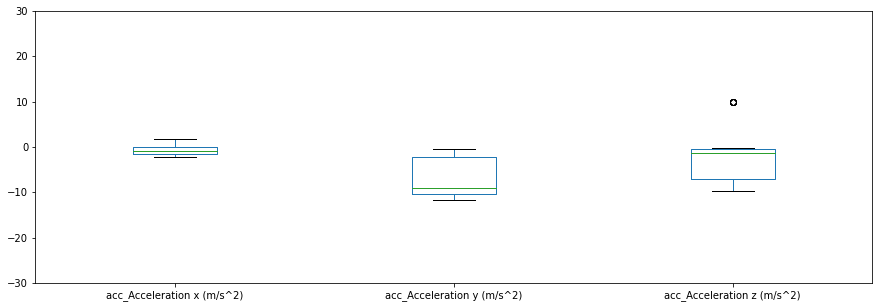

Figure saved to figures/figure_2.png


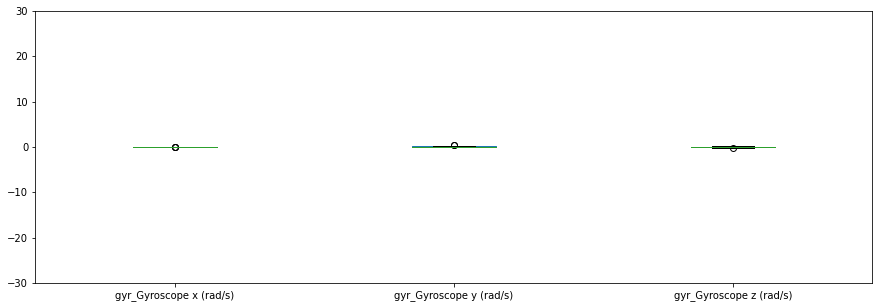

Figure saved to figures/figure_3.png


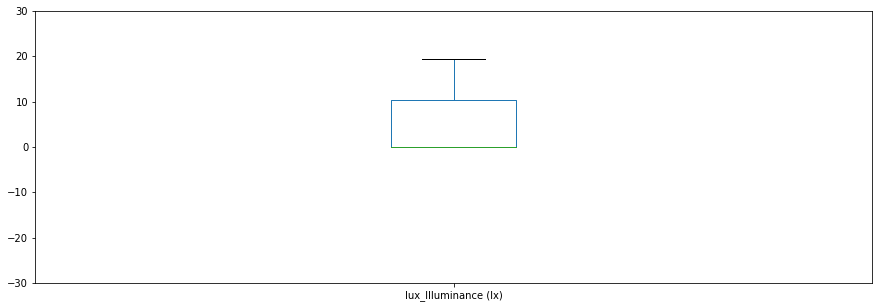

Figure saved to figures/figure_4.png


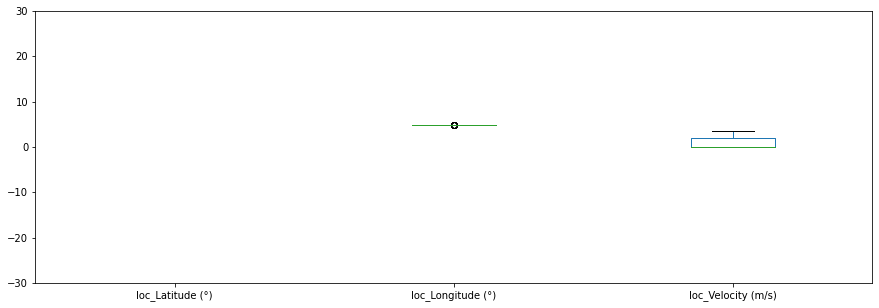

Figure saved to figures/figure_5.png


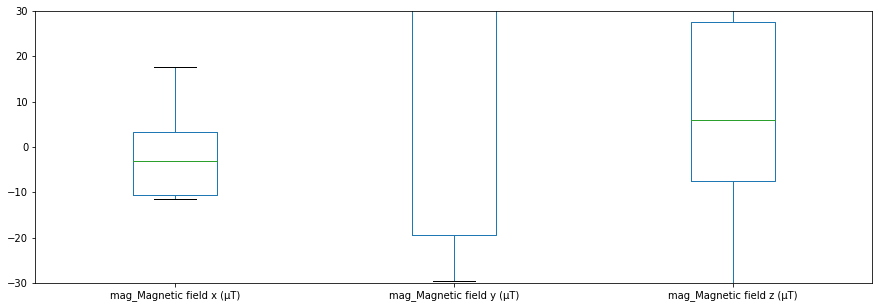

Figure saved to figures/figure_6.png


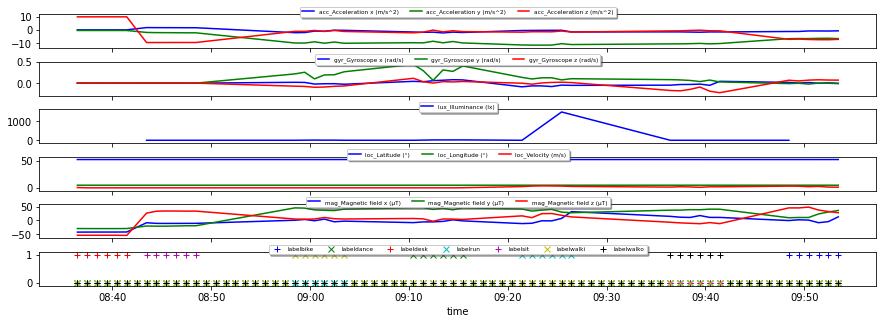

       gyr_Gyroscope x (rad/s)  gyr_Gyroscope y (rad/s)  gyr_Gyroscope z (rad/s)  lux_Illuminance (lx)  loc_Latitude (°)  loc_Longitude (°)  loc_Velocity (m/s)  mag_Magnetic field x (µT)  mag_Magnetic field y (µT)  mag_Magnetic field z (µT)  labelbike  labeldance  labeldesk  labelrun  labelsit  labelwalki  labelwalko
count                   42.000                   42.000                   42.000                13.000            41.000             41.000              41.000                     42.000                     42.000                     42.000     78.000      78.000     78.000    78.000    78.000      78.000      78.000
mean                    -0.004                    0.096                   -0.019               119.920            52.332              4.866               1.041                     -5.705                     18.422                      5.289      0.077       0.077      0.077     0.077     0.077       0.077       0.077
std                      0.039             

In [9]:
Dataset = CreateDataset(raw_data_path , granularities[0])

Dataset.add_numerical_dataset("Accelerometer.csv", timecol, accfeatures, "avg", "acc_")
Dataset.add_numerical_dataset("Gyroscope.csv", timecol, gyfeatures, "avg", "gyr_")
Dataset.add_numerical_dataset("Light.csv", timecol, lightfeatures, "avg", "lux_")
Dataset.add_numerical_dataset("Location.csv", timecol, locfeatures, "avg", "loc_")
Dataset.add_numerical_dataset("Magnetometer.csv", timecol, magfeatures, "avg", "mag_")
Dataset.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

dataset = Dataset.data_table
Dataviz = VisualizeDataset()

Dataviz.plot_dataset_boxplot(dataset, ['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)', 'acc_Acceleration z (m/s^2)'])
Dataviz.plot_dataset_boxplot(dataset, ['gyr_Gyroscope x (rad/s)', 'gyr_Gyroscope y (rad/s)', 'gyr_Gyroscope z (rad/s)'])
Dataviz.plot_dataset_boxplot(dataset, ['lux_Illuminance (lx)'])
Dataviz.plot_dataset_boxplot(dataset, ['loc_Latitude (°)', 'loc_Longitude (°)', "loc_Velocity (m/s)"])
Dataviz.plot_dataset_boxplot(dataset, ['mag_Magnetic field x (µT)', 'mag_Magnetic field y (µT)', 'mag_Magnetic field z (µT)'])



Dataviz.plot_dataset(dataset, ["acc_", "gyr_", "lux_", "loc_", "mag_", "label"], \
                        ["like", "like", "like", "like", "like", "like"], \
                        ["line", "line", "line", "line", "line", "points"])


util.print_statistics(dataset)
datasets.append(copy.deepcopy(dataset))

Reading data from Accelerometer.csv
Reading data from Gyroscope.csv
Reading data from Light.csv
Reading data from Location.csv
Reading data from Magnetometer.csv
Reading data from labels.csv
Figure saved to figures/figure_1.png


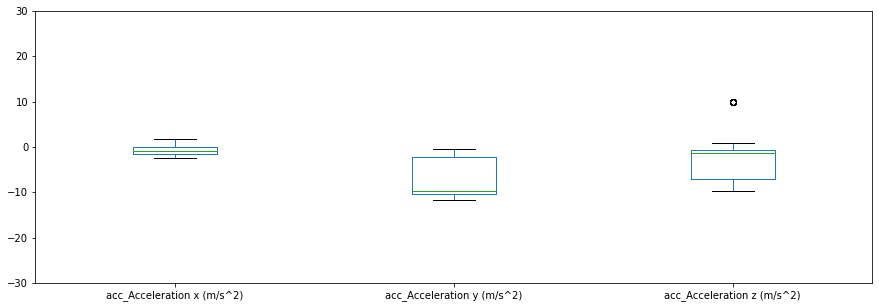

Figure saved to figures/figure_2.png


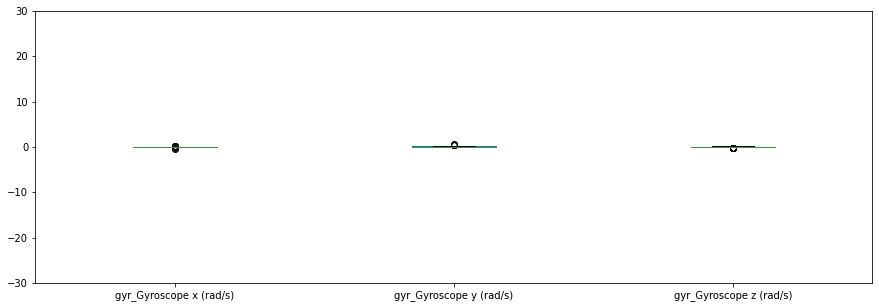

Figure saved to figures/figure_3.png


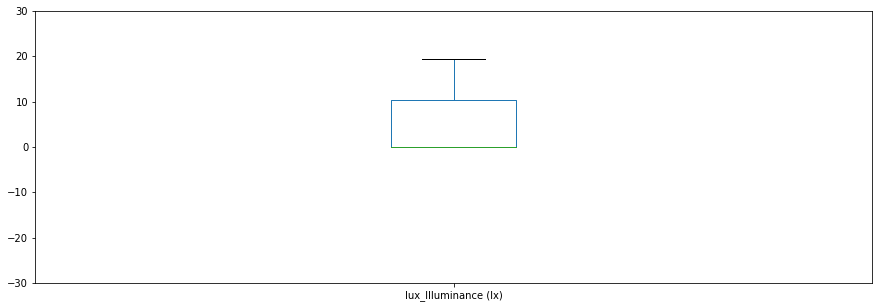

Figure saved to figures/figure_4.png


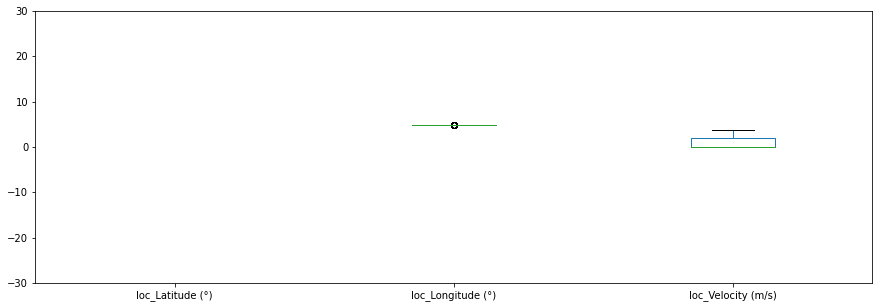

Figure saved to figures/figure_5.png


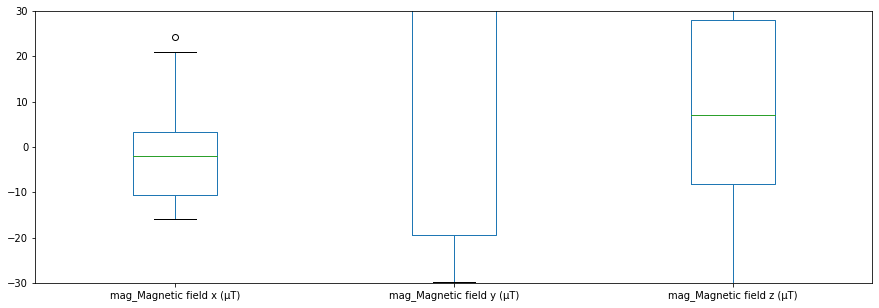

Figure saved to figures/figure_6.png


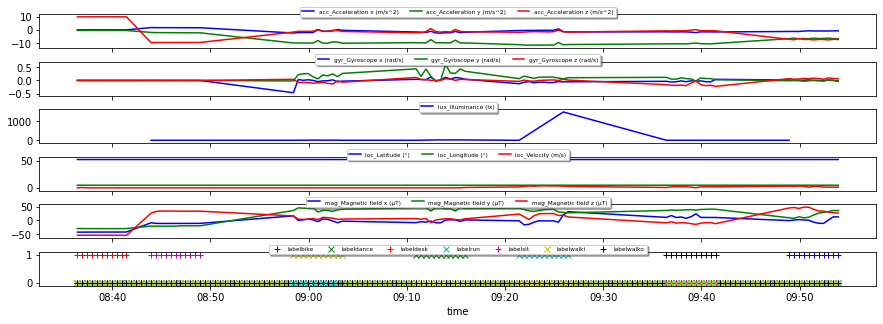

       gyr_Gyroscope x (rad/s)  gyr_Gyroscope y (rad/s)  gyr_Gyroscope z (rad/s)  lux_Illuminance (lx)  loc_Latitude (°)  loc_Longitude (°)  loc_Velocity (m/s)  mag_Magnetic field x (µT)  mag_Magnetic field y (µT)  mag_Magnetic field z (µT)  labelbike  labeldance  labeldesk  labelrun  labelsit  labelwalki  labelwalko
count                   77.000                   77.000                   77.000                13.000            75.000             75.000              75.000                     77.000                     77.000                     77.000    156.000     156.000    156.000   156.000   156.000     156.000     156.000
mean                    -0.012                    0.090                   -0.018               119.920            52.332              4.866               1.025                     -5.696                     18.486                      5.563      0.071       0.071      0.071     0.071     0.071       0.071       0.071
std                      0.069             

In [10]:
Dataset = CreateDataset(raw_data_path , granularities[1])

Dataset.add_numerical_dataset("Accelerometer.csv", timecol, accfeatures, "avg", "acc_")
Dataset.add_numerical_dataset("Gyroscope.csv", timecol, gyfeatures, "avg", "gyr_")
Dataset.add_numerical_dataset("Light.csv", timecol, lightfeatures, "avg", "lux_")
Dataset.add_numerical_dataset("Location.csv", timecol, locfeatures, "avg", "loc_")
Dataset.add_numerical_dataset("Magnetometer.csv", timecol, magfeatures, "avg", "mag_")
Dataset.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

dataset = Dataset.data_table
Dataviz = VisualizeDataset()

Dataviz.plot_dataset_boxplot(dataset, ['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)', 'acc_Acceleration z (m/s^2)'])
Dataviz.plot_dataset_boxplot(dataset, ['gyr_Gyroscope x (rad/s)', 'gyr_Gyroscope y (rad/s)', 'gyr_Gyroscope z (rad/s)'])
Dataviz.plot_dataset_boxplot(dataset, ['lux_Illuminance (lx)'])
Dataviz.plot_dataset_boxplot(dataset, ['loc_Latitude (°)', 'loc_Longitude (°)', "loc_Velocity (m/s)"])
Dataviz.plot_dataset_boxplot(dataset, ['mag_Magnetic field x (µT)', 'mag_Magnetic field y (µT)', 'mag_Magnetic field z (µT)'])



Dataviz.plot_dataset(dataset, ["acc_", "gyr_", "lux_", "loc_", "mag_", "label"], \
                        ["like", "like", "like", "like", "like", "like"], \
                        ["line", "line", "line", "line", "line", "points"])


util.print_statistics(dataset)
datasets.append(copy.deepcopy(dataset))

Reading data from Accelerometer.csv
Reading data from Gyroscope.csv
Reading data from Light.csv
Reading data from Location.csv
Reading data from Magnetometer.csv
Reading data from labels.csv
Figure saved to figures/figure_1.png


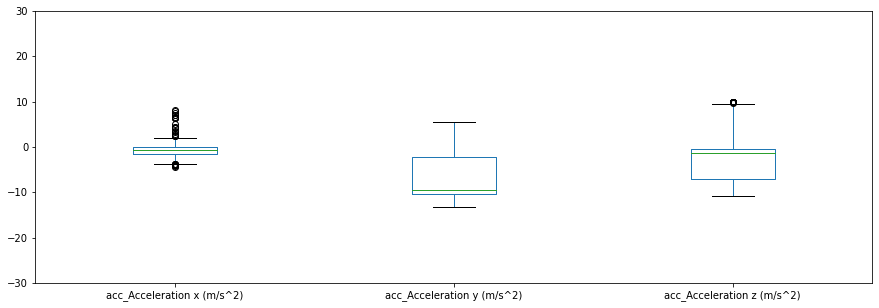

Figure saved to figures/figure_2.png


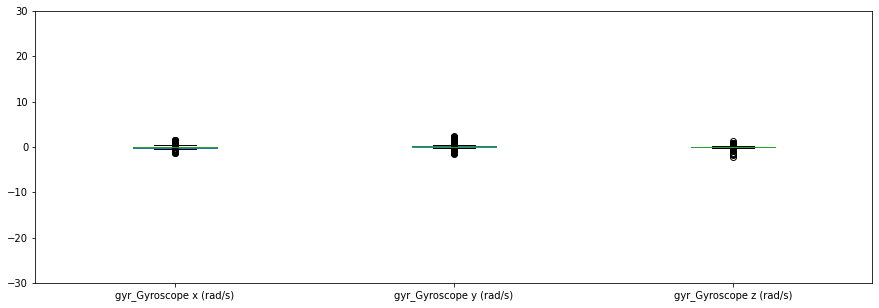

Figure saved to figures/figure_3.png


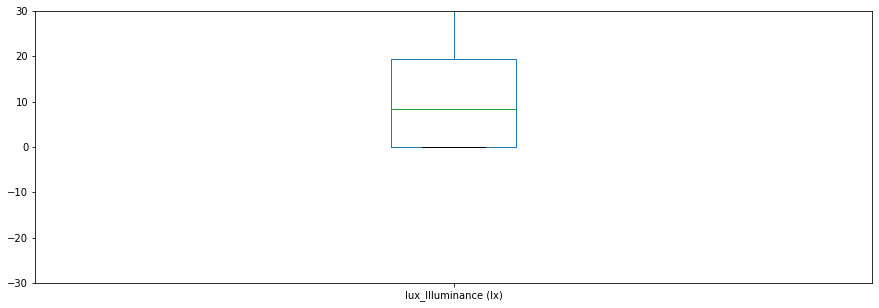

Figure saved to figures/figure_4.png


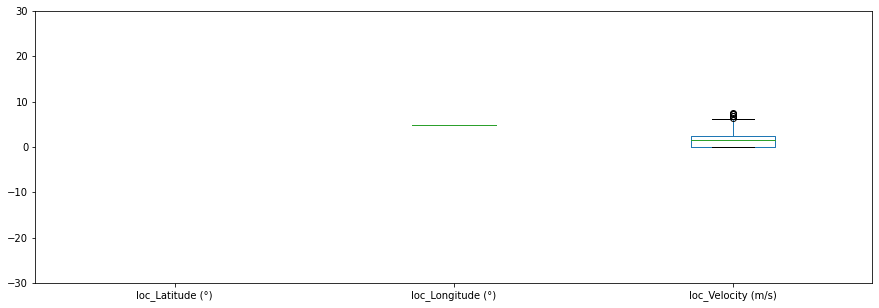

Figure saved to figures/figure_5.png


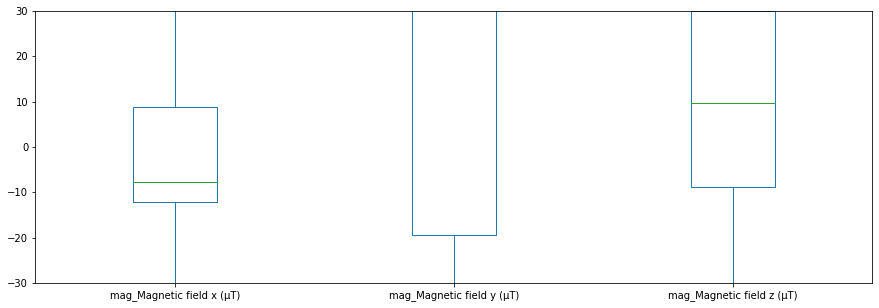

Figure saved to figures/figure_6.png


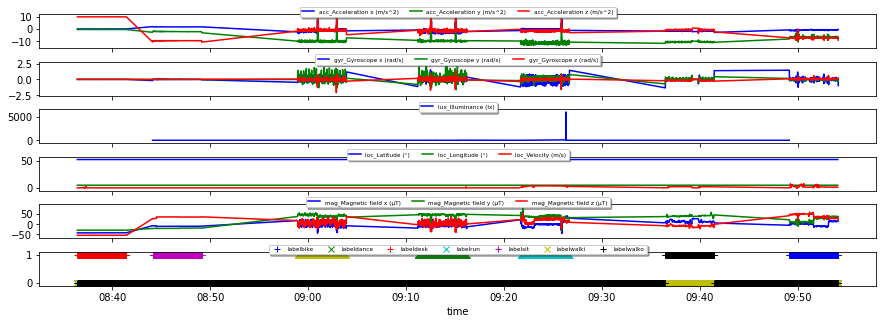

       gyr_Gyroscope x (rad/s)  gyr_Gyroscope y (rad/s)  gyr_Gyroscope z (rad/s)  lux_Illuminance (lx)  loc_Latitude (°)  loc_Longitude (°)  loc_Velocity (m/s)  mag_Magnetic field x (µT)  mag_Magnetic field y (µT)  mag_Magnetic field z (µT)  labelbike  labeldance  labeldesk  labelrun  labelsit  labelwalki  labelwalko
count                 2108.000                 2108.000                 2108.000                35.000          1356.000           1356.000            1356.000                   2108.000                   2108.000                   2108.000   4664.000    4664.000   4664.000  4664.000  4664.000    4664.000    4664.000
mean                    -0.006                    0.091                   -0.019               259.623            52.331              4.866               1.535                     -6.165                     18.396                      5.530      0.065       0.065      0.065     0.065     0.065       0.065       0.065
std                      0.321             

In [11]:
Dataset = CreateDataset(raw_data_path , granularities[2])

Dataset.add_numerical_dataset("Accelerometer.csv", timecol, accfeatures, "avg", "acc_")
Dataset.add_numerical_dataset("Gyroscope.csv", timecol, gyfeatures, "avg", "gyr_")
Dataset.add_numerical_dataset("Light.csv", timecol, lightfeatures, "avg", "lux_")
Dataset.add_numerical_dataset("Location.csv", timecol, locfeatures, "avg", "loc_")
Dataset.add_numerical_dataset("Magnetometer.csv", timecol, magfeatures, "avg", "mag_")
Dataset.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

dataset = Dataset.data_table
Dataviz = VisualizeDataset()

Dataviz.plot_dataset_boxplot(dataset, ['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)', 'acc_Acceleration z (m/s^2)'])
Dataviz.plot_dataset_boxplot(dataset, ['gyr_Gyroscope x (rad/s)', 'gyr_Gyroscope y (rad/s)', 'gyr_Gyroscope z (rad/s)'])
Dataviz.plot_dataset_boxplot(dataset, ['lux_Illuminance (lx)'])
Dataviz.plot_dataset_boxplot(dataset, ['loc_Latitude (°)', 'loc_Longitude (°)', "loc_Velocity (m/s)"])
Dataviz.plot_dataset_boxplot(dataset, ['mag_Magnetic field x (µT)', 'mag_Magnetic field y (µT)', 'mag_Magnetic field z (µT)'])



Dataviz.plot_dataset(dataset, ["acc_", "gyr_", "lux_", "loc_", "mag_", "label"], \
                        ["like", "like", "like", "like", "like", "like"], \
                        ["line", "line", "line", "line", "line", "points"])


util.print_statistics(dataset)
datasets.append(copy.deepcopy(dataset))

Reading data from Accelerometer.csv
Reading data from Gyroscope.csv
Reading data from Light.csv
Reading data from Location.csv
Reading data from Magnetometer.csv
Reading data from labels.csv
Figure saved to figures/figure_1.png


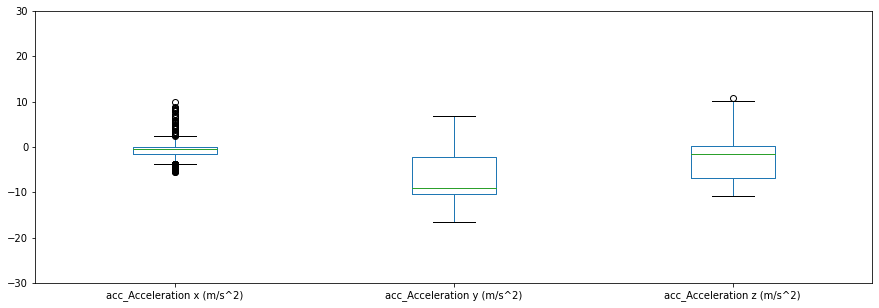

Figure saved to figures/figure_2.png


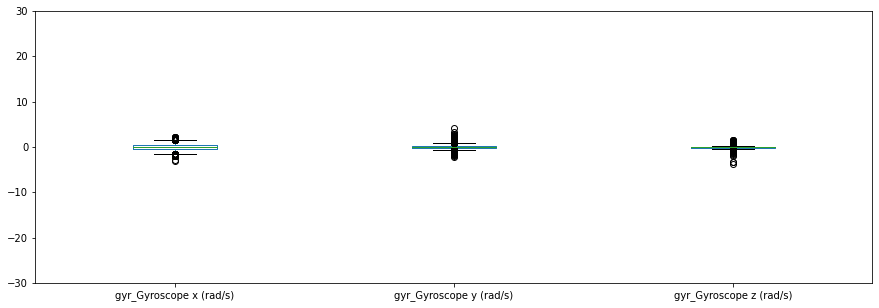

Figure saved to figures/figure_3.png


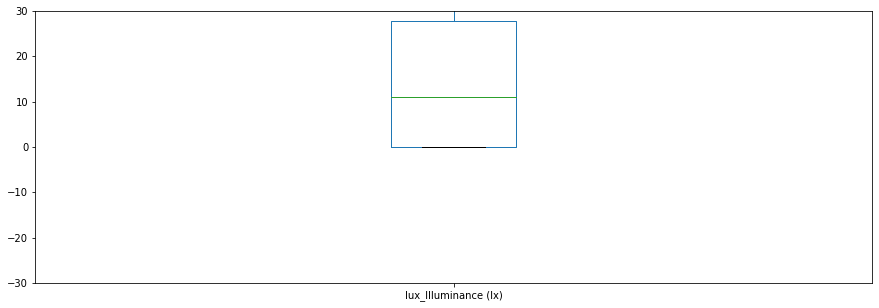

Figure saved to figures/figure_4.png


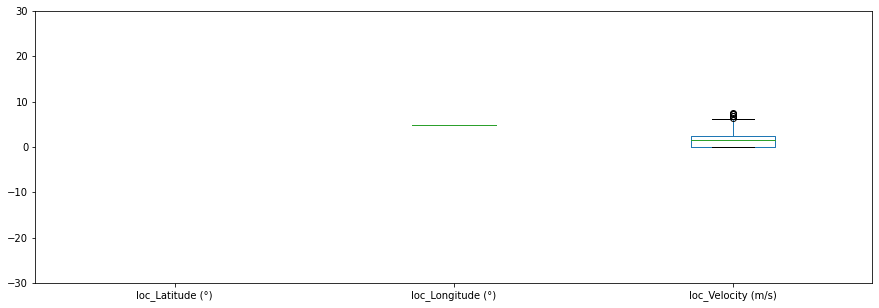

Figure saved to figures/figure_5.png


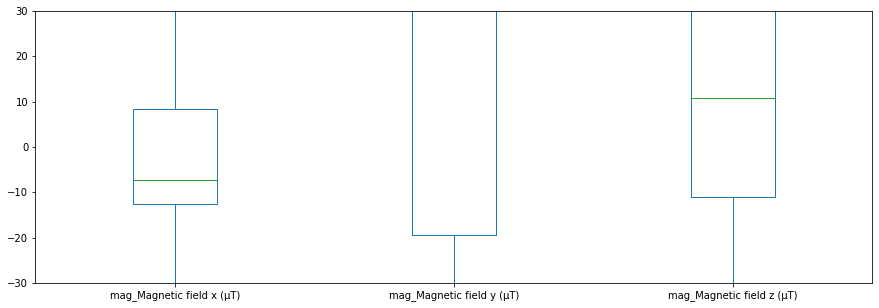

Figure saved to figures/figure_6.png


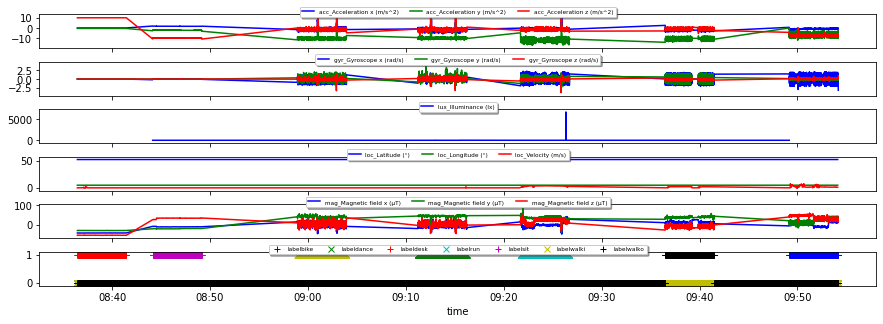

       gyr_Gyroscope x (rad/s)  gyr_Gyroscope y (rad/s)  gyr_Gyroscope z (rad/s)  lux_Illuminance (lx)  loc_Latitude (°)  loc_Longitude (°)  loc_Velocity (m/s)  mag_Magnetic field x (µT)  mag_Magnetic field y (µT)  mag_Magnetic field z (µT)  labelbike  labeldance  labeldesk  labelrun  labelsit  labelwalki  labelwalko
count                 4208.000                 4208.000                 4208.000                54.000          1356.000           1356.000            1356.000                   4208.000                   4208.000                   4208.000   9328.000    9328.000   9328.000  9328.000  9328.000    9328.000    9328.000
mean                    -0.007                    0.091                   -0.019               293.884            52.331              4.866               1.535                     -6.163                     18.404                      5.515      0.064       0.064      0.064     0.064     0.065       0.064       0.064
std                      0.905             

In [12]:
Dataset = CreateDataset(raw_data_path , granularities[3])

Dataset.add_numerical_dataset("Accelerometer.csv", timecol, accfeatures, "avg", "acc_")
Dataset.add_numerical_dataset("Gyroscope.csv", timecol, gyfeatures, "avg", "gyr_")
Dataset.add_numerical_dataset("Light.csv", timecol, lightfeatures, "avg", "lux_")
Dataset.add_numerical_dataset("Location.csv", timecol, locfeatures, "avg", "loc_")
Dataset.add_numerical_dataset("Magnetometer.csv", timecol, magfeatures, "avg", "mag_")
Dataset.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

dataset = Dataset.data_table
Dataviz = VisualizeDataset()

Dataviz.plot_dataset_boxplot(dataset, ['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)', 'acc_Acceleration z (m/s^2)'])
Dataviz.plot_dataset_boxplot(dataset, ['gyr_Gyroscope x (rad/s)', 'gyr_Gyroscope y (rad/s)', 'gyr_Gyroscope z (rad/s)'])
Dataviz.plot_dataset_boxplot(dataset, ['lux_Illuminance (lx)'])
Dataviz.plot_dataset_boxplot(dataset, ['loc_Latitude (°)', 'loc_Longitude (°)', "loc_Velocity (m/s)"])
Dataviz.plot_dataset_boxplot(dataset, ['mag_Magnetic field x (µT)', 'mag_Magnetic field y (µT)', 'mag_Magnetic field z (µT)'])



Dataviz.plot_dataset(dataset, ["acc_", "gyr_", "lux_", "loc_", "mag_", "label"], \
                        ["like", "like", "like", "like", "like", "like"], \
                        ["line", "line", "line", "line", "line", "points"])


util.print_statistics(dataset)
datasets.append(copy.deepcopy(dataset))

Reading data from Accelerometer.csv
Reading data from Gyroscope.csv
Reading data from Light.csv
Reading data from Location.csv
Reading data from Magnetometer.csv
Reading data from labels.csv
Figure saved to figures/figure_1.png


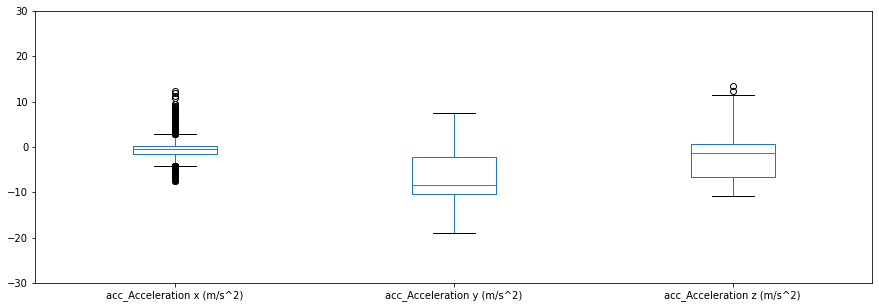

Figure saved to figures/figure_2.png


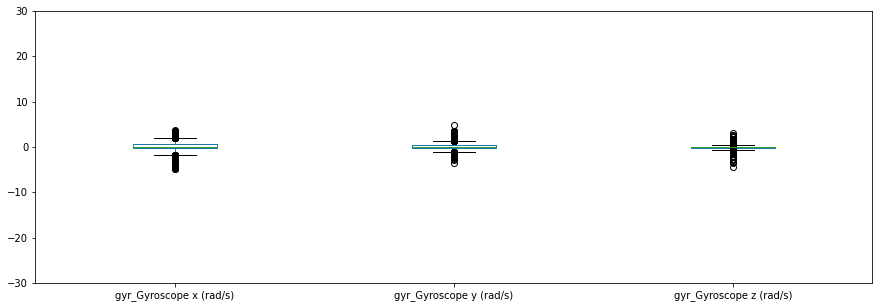

Figure saved to figures/figure_3.png


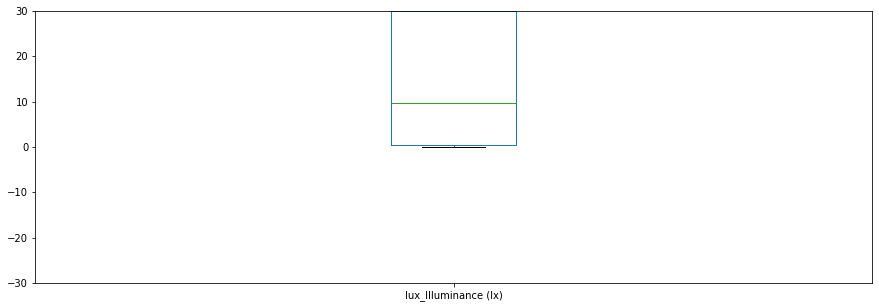

Figure saved to figures/figure_4.png


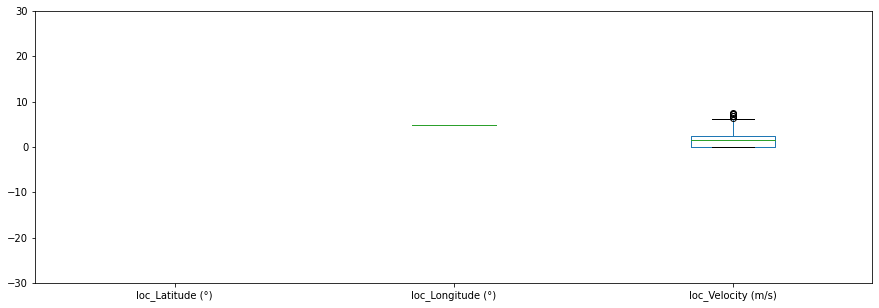

Figure saved to figures/figure_5.png


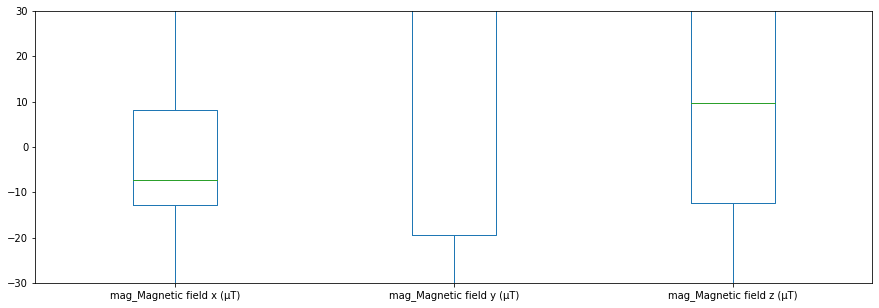

Figure saved to figures/figure_6.png


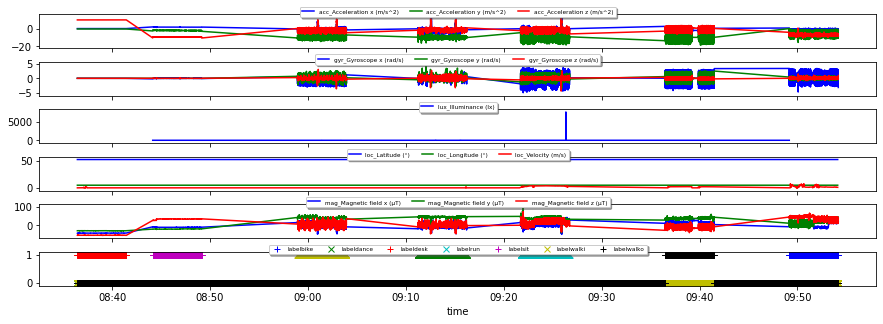

       gyr_Gyroscope x (rad/s)  gyr_Gyroscope y (rad/s)  gyr_Gyroscope z (rad/s)  lux_Illuminance (lx)  loc_Latitude (°)  loc_Longitude (°)  loc_Velocity (m/s)  mag_Magnetic field x (µT)  mag_Magnetic field y (µT)  mag_Magnetic field z (µT)  labelbike  labeldance  labeldesk   labelrun   labelsit  labelwalki  labelwalko
count                 8408.000                 8408.000                 8408.000                76.000          1356.000           1356.000            1356.000                   8408.000                   8408.000                   8408.000  18655.000   18655.000  18655.000  18655.000  18655.000   18655.000   18655.000
mean                    -0.006                    0.092                   -0.019               441.299            52.331              4.866               1.535                     -6.164                     18.408                      5.513      0.064       0.064      0.064      0.064      0.064       0.064       0.064
std                      1.446       

In [51]:
Dataset = CreateDataset(raw_data_path , granularities[4])

Dataset.add_numerical_dataset("Accelerometer.csv", timecol, accfeatures, "avg", "acc_")
Dataset.add_numerical_dataset("Gyroscope.csv", timecol, gyfeatures, "avg", "gyr_")
Dataset.add_numerical_dataset("Light.csv", timecol, lightfeatures, "avg", "lux_")
Dataset.add_numerical_dataset("Location.csv", timecol, locfeatures, "avg", "loc_")
Dataset.add_numerical_dataset("Magnetometer.csv", timecol, magfeatures, "avg", "mag_")
Dataset.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

dataset = Dataset.data_table
Dataviz = VisualizeDataset()

Dataviz.plot_dataset_boxplot(dataset, ['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)', 'acc_Acceleration z (m/s^2)'])
Dataviz.plot_dataset_boxplot(dataset, ['gyr_Gyroscope x (rad/s)', 'gyr_Gyroscope y (rad/s)', 'gyr_Gyroscope z (rad/s)'])
Dataviz.plot_dataset_boxplot(dataset, ['lux_Illuminance (lx)'])
Dataviz.plot_dataset_boxplot(dataset, ['loc_Latitude (°)', 'loc_Longitude (°)', "loc_Velocity (m/s)"])
Dataviz.plot_dataset_boxplot(dataset, ['mag_Magnetic field x (µT)', 'mag_Magnetic field y (µT)', 'mag_Magnetic field z (µT)'])



Dataviz.plot_dataset(dataset, ["acc_", "gyr_", "lux_", "loc_", "mag_", "label"], \
                        ["like", "like", "like", "like", "like", "like"], \
                        ["line", "line", "line", "line", "line", "points"])


util.print_statistics(dataset)
datasets.append(copy.deepcopy(dataset))

Reading data from Accelerometer.csv
Reading data from Gyroscope.csv
Reading data from Light.csv
Reading data from Location.csv
Reading data from Magnetometer.csv
Reading data from labels.csv
Figure saved to figures/figure_1.png


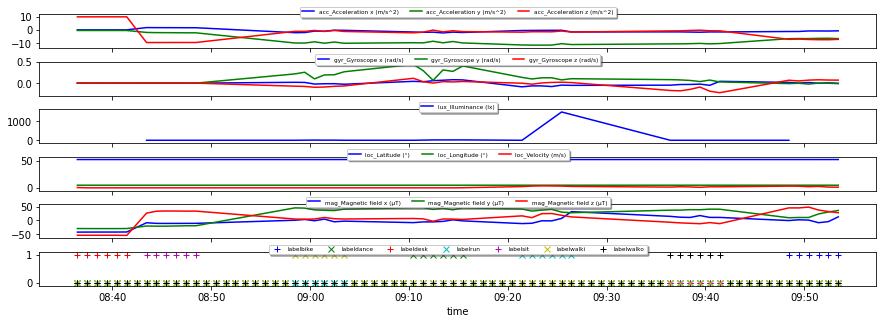

       gyr_Gyroscope x (rad/s)  gyr_Gyroscope y (rad/s)  gyr_Gyroscope z (rad/s)  lux_Illuminance (lx)  loc_Latitude (°)  loc_Longitude (°)  loc_Velocity (m/s)  mag_Magnetic field x (µT)  mag_Magnetic field y (µT)  mag_Magnetic field z (µT)  labelbike  labeldance  labeldesk  labelrun  labelsit  labelwalki  labelwalko
count                   42.000                   42.000                   42.000                13.000            41.000             41.000              41.000                     42.000                     42.000                     42.000     78.000      78.000     78.000    78.000    78.000      78.000      78.000
mean                    -0.004                    0.096                   -0.019               119.920            52.332              4.866               1.041                     -5.705                     18.422                      5.289      0.077       0.077      0.077     0.077     0.077       0.077       0.077
std                      0.039             

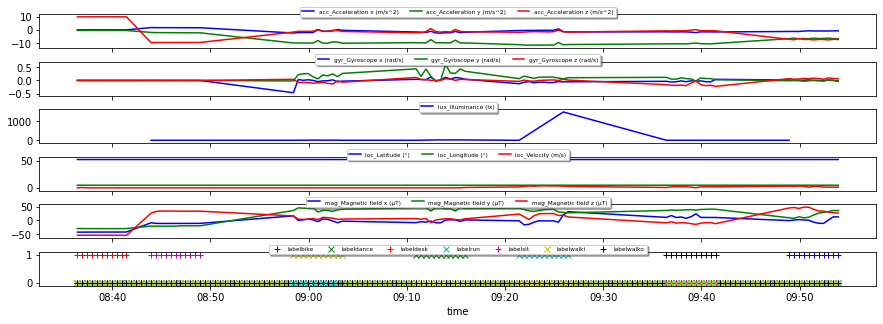

       gyr_Gyroscope x (rad/s)  gyr_Gyroscope y (rad/s)  gyr_Gyroscope z (rad/s)  lux_Illuminance (lx)  loc_Latitude (°)  loc_Longitude (°)  loc_Velocity (m/s)  mag_Magnetic field x (µT)  mag_Magnetic field y (µT)  mag_Magnetic field z (µT)  labelbike  labeldance  labeldesk  labelrun  labelsit  labelwalki  labelwalko
count                   77.000                   77.000                   77.000                13.000            75.000             75.000              75.000                     77.000                     77.000                     77.000    156.000     156.000    156.000   156.000   156.000     156.000     156.000
mean                    -0.012                    0.090                   -0.018               119.920            52.332              4.866               1.025                     -5.696                     18.486                      5.563      0.071       0.071      0.071     0.071     0.071       0.071       0.071
std                      0.069             

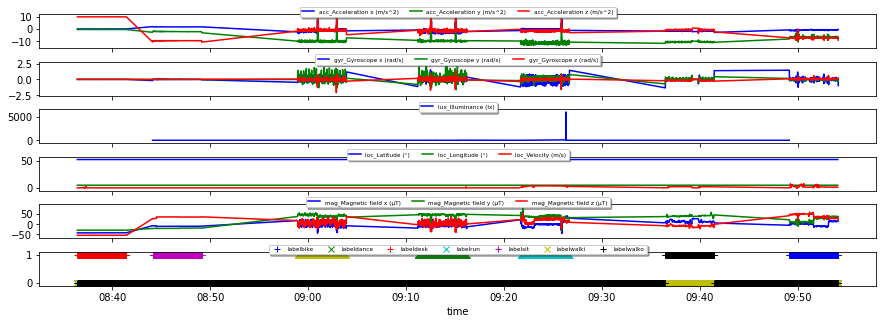

       gyr_Gyroscope x (rad/s)  gyr_Gyroscope y (rad/s)  gyr_Gyroscope z (rad/s)  lux_Illuminance (lx)  loc_Latitude (°)  loc_Longitude (°)  loc_Velocity (m/s)  mag_Magnetic field x (µT)  mag_Magnetic field y (µT)  mag_Magnetic field z (µT)  labelbike  labeldance  labeldesk  labelrun  labelsit  labelwalki  labelwalko
count                 2108.000                 2108.000                 2108.000                35.000          1356.000           1356.000            1356.000                   2108.000                   2108.000                   2108.000   4664.000    4664.000   4664.000  4664.000  4664.000    4664.000    4664.000
mean                    -0.006                    0.091                   -0.019               259.623            52.331              4.866               1.535                     -6.165                     18.396                      5.530      0.065       0.065      0.065     0.065     0.065       0.065       0.065
std                      0.321             

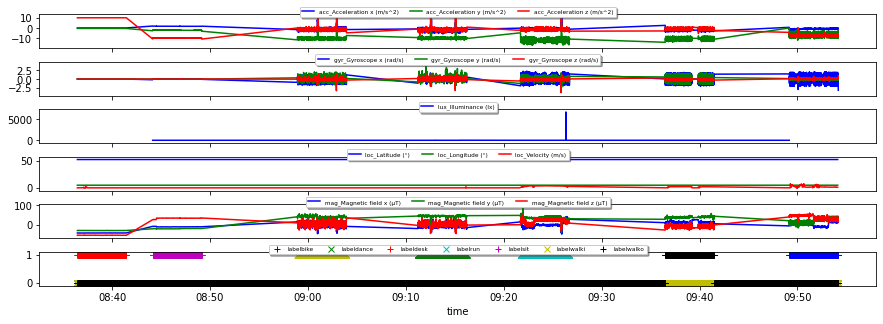

       gyr_Gyroscope x (rad/s)  gyr_Gyroscope y (rad/s)  gyr_Gyroscope z (rad/s)  lux_Illuminance (lx)  loc_Latitude (°)  loc_Longitude (°)  loc_Velocity (m/s)  mag_Magnetic field x (µT)  mag_Magnetic field y (µT)  mag_Magnetic field z (µT)  labelbike  labeldance  labeldesk  labelrun  labelsit  labelwalki  labelwalko
count                 4208.000                 4208.000                 4208.000                54.000          1356.000           1356.000            1356.000                   4208.000                   4208.000                   4208.000   9328.000    9328.000   9328.000  9328.000  9328.000    9328.000    9328.000
mean                    -0.007                    0.091                   -0.019               293.884            52.331              4.866               1.535                     -6.163                     18.404                      5.515      0.064       0.064      0.064     0.064     0.065       0.064       0.064
std                      0.905             

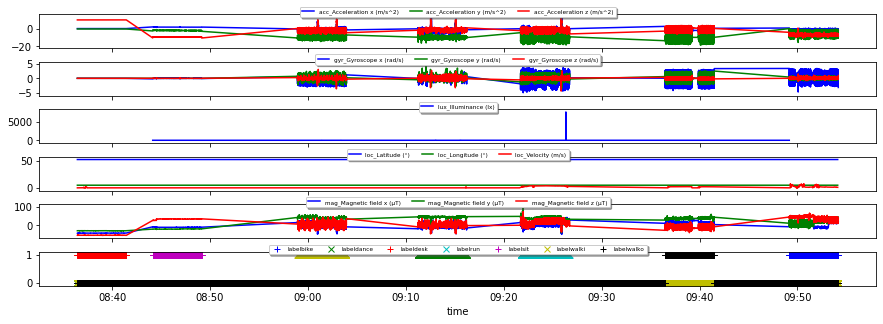

       gyr_Gyroscope x (rad/s)  gyr_Gyroscope y (rad/s)  gyr_Gyroscope z (rad/s)  lux_Illuminance (lx)  loc_Latitude (°)  loc_Longitude (°)  loc_Velocity (m/s)  mag_Magnetic field x (µT)  mag_Magnetic field y (µT)  mag_Magnetic field z (µT)  labelbike  labeldance  labeldesk   labelrun   labelsit  labelwalki  labelwalko
count                 8408.000                 8408.000                 8408.000                76.000          1356.000           1356.000            1356.000                   8408.000                   8408.000                   8408.000  18655.000   18655.000  18655.000  18655.000  18655.000   18655.000   18655.000
mean                    -0.006                    0.092                   -0.019               441.299            52.331              4.866               1.535                     -6.164                     18.408                      5.513      0.064       0.064      0.064      0.064      0.064       0.064       0.064
std                      1.446       

In [14]:
for g in granularities:
    
    Dataset = CreateDataset(raw_data_path , g)

    Dataset.add_numerical_dataset("Accelerometer.csv", timecol, accfeatures, "avg", "acc_")

    Dataset.add_numerical_dataset("Gyroscope.csv", timecol, gyfeatures, "avg", "gyr_")
    
    Dataset.add_numerical_dataset("Light.csv", timecol, lightfeatures, "avg", "lux_")
    
    Dataset.add_numerical_dataset("Location.csv", timecol, locfeatures, "avg", "loc_")
    
    Dataset.add_numerical_dataset("Magnetometer.csv", timecol, magfeatures, "avg", "mag_")
    
    Dataset.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

    dataset = Dataset.data_table
    
    Dataviz = VisualizeDataset()

    Dataviz.plot_dataset(dataset, ["acc_", "gyr_", "lux_", "loc_", "mag_", "label"], \
                            ["like", "like", "like", "like", "like", "like"], \
                            ["line", "line", "line", "line", "line", "points"])
   
    
    util.print_statistics(dataset)
    datasets.append(copy.deepcopy(dataset))

In [54]:
dataset.to_csv(output_data_path + "_own_dataset.csv")